<a href="https://colab.research.google.com/github/larissamazzero/RMN/blob/main/PLS/pls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Partial Least Squares Regression (PLS)

##Definição

A regressão PLS (partial least squares) vem sendo amplamente utilizada em procedimentos de seleção de variáveis por sua capacidade de operar com grande número de variáveis correlacionadas e afetadas por ruído. 

Este artigo propõe um método para identificar o melhor subconjunto de variáveis de processo para a predição das variáveis de resposta. É uma técnica que reduz os preditores a um conjunto menor de componentes não correlacionados e efetua regressão de mínimos quadrados para esses componentes no lugar dos dados originais. 

A regressão PLS é particularmente útil quando os preditores são altamente colineares ou quando existem mais preditores do que observações e a regressão de mínimos quadrados ordinários gera coeficientes com erros padrão altos ou que falha totalmente.

##Casos de uso

A regressão PLS é usada primariamente nos setores químico, farmacêutico, alimentício e plástico. Uma aplicação comum consiste em modelar a relação entre medidas espectrais (NIR, IR e UV), que incluem muitas variáveis frequentemente correlacionadas entre si, e composição química ou outras propriedades físico-químicas. Na regressão PLS, a ênfase está em desenvolver modelos preditivos. Por isso ela não é muito usada para filtrar variáveis que não sejam úteis para explicar a resposta.

FONTE: https://support.minitab.com/pt-br/minitab/20/help-and-how-to/statistical-modeling/regression/supporting-topics/partial-least-squares-regression/what-is-partial-least-squares-regression/

##Funcionamento

A regressão PLS relaciona a matriz X (composta por variáveis de processo x) à matriz Y (composta por variáveis de produto y), permitindo analisar dados com forte correlação, elevados níveis de ruído e desequilíbrio entre o número de variáveis e observações. Tal regressão gera um conjunto de parâmetros que fornecem informações sobre a estrutura e comportamento de X e Y, o que corrobora para sua ampla aplicação em procedimentos de seleção de variáveis (WOLD; SJÖSTRÖM; ERIKSSON, 2001).

Etapa 1: Dividir o banco de dados em conjuntos de treino e teste

Etapa 2: Aplicar a regressão PLS no conjunto de treino e gerar índices de importância das variáveis

Etapa 3: Predizer a variável de resposta y para o conjunto de treino e eliminar as variáveis irrelevantes e ruidosas

Etapa 4: Construir um gráfico para identificar o melhor subconjunto de variáveis e testar essas variáveis no conjunto de teste

Etapa 5: Comparar o desempenho dos índices de importância e identificar o melhor método para a seleção de variáveis

FONTE: https://www.scielo.br/j/prod/a/7Pbw8HKvxD7F87rTSLJqCFD/?format=pdf&lang=pt#:~:text=A%20regressão%20PLS%20consiste%20em,número%20reduzido%20de%20combinações%20lineares.

Enquanto o PCA constrói as variáveis compostas para explicar a variabilidade máxima em todos os preditores originais, ou as variáveis explicativas de interesse, o PLS cria suas variáveis compostas para explicar a variabilidade máxima na resposta dentro do contexto da regressão linear.

FONTE: https://gpsych.bmj.com/content/35/1/e100662

* Padronizar tanto as variáveis preditoras quanto as de resposta.
* Calcular M combinações lineares (chamadas de "componentes PLS") das variáveis preditoras p originais que explicam uma quantidade significativa de variação tanto na variável de resposta quanto nas variáveis preditoras.
* Use o método dos mínimos quadrados para se ajustar a um modelo de regressão linear usando os componentes PLS como preditores.
* Use a validação cruzada k-fold para encontrar o número ideal de componentes PLS para manter no modelo.




##Requisitos

* As variáveis dependentes e independentes devem ter uma relação linear.
* As variáveis independentes não estão todas altamente correlacionadas. 
* Verifique a multicolinearidade usando uma matriz de correlação.
* Os outliers são tratados adequadamente, pois podem ter um forte impacto nos resultados. Verifique os valores aberrantes usando um gráfico de dispersão ou outros gráficos.
* Os dados seguem uma distribuição normal multivariada. Verifique a normalidade usando um teste de adequação.

##Exemplo de aplicação

In [9]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
#Carregando o dataset
data = pd.read_csv("/content/peach_spectra_brix.csv")

In [17]:
data.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,...,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,...,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,...,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,...,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,...,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,...,0.719793,0.718875,0.716860,0.713771,0.709577,0.704232,0.697717,0.689882,0.680748,0.670263


In [18]:
#Separando entre preditores (X, dados de treino) e resposta (y, target)
y = data['Brix'].values
X = data.values[:, 1:]

In [21]:
y.shape

(50,)

In [20]:
X.shape

(50, 600)

In [22]:
#Visualizando quantidade de dados de treino.
wl = np.arange(1100, 2300, 2)
print(len(wl))

600


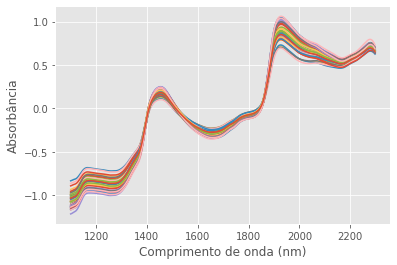

In [35]:
with plt.style.context('ggplot'):
    plt.plot(wl, X.T)
    plt.xlabel("Comprimento de onda (nm)")
    plt.ylabel("Absorbância")

In [24]:
X2 = savgol_filter(X, 17, polyorder=2, deriv=2)

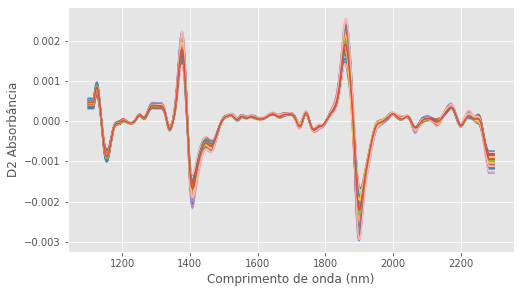

In [36]:
#Plotando o gráfico.
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(wl, X2.T)
    plt.xlabel("Comprimento de onda (nm)")
    plt.ylabel("D2 Absorbância")
    plt.show()

In [26]:
#Função PLS
def optimise_pls_cv(X, y, n_comp):
    #Definindo o objeto PLS
    pls = PLSRegression(n_components=n_comp)

    #Validação cruzada 
    y_cv = cross_val_predict(pls, X, y, cv=10)

    #Avaliando resultado
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [27]:
#Teste com 40 componentes.
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [37]:
#Plotando MSES (média de erro quadrática)
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Número de componentes PLS')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

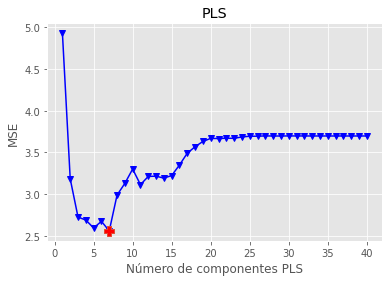

In [38]:
plot_metrics(mses, 'MSE', 'min')

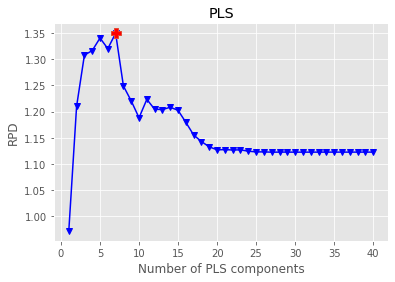

In [30]:
plot_metrics(rpds, 'RPD', 'max')

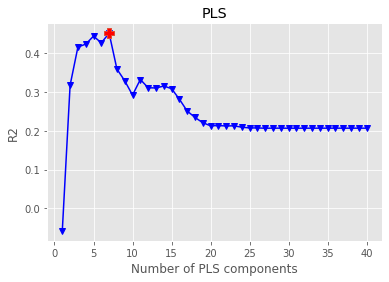

In [31]:
plot_metrics(r2s, 'R2', 'max')

In [32]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 7)

In [33]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.4509, MSE: 2.5585, RPD: 1.3495


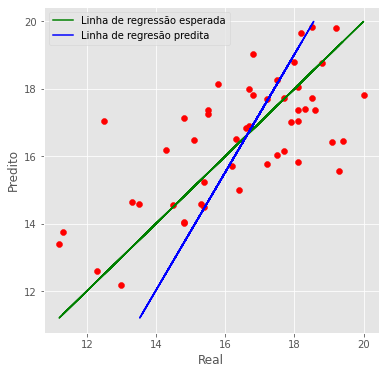

In [41]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Linha de regressão esperada')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Linha de regresão predita')
    plt.xlabel('Real')
    plt.ylabel('Predito')
    plt.legend()
    plt.plot()